In [26]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from keras import Sequential
import keras
import matplotlib.pyplot as plt
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten

In [19]:
dir(keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [49]:
(train_data, train_labels),(test_data, test_labels) = cifar10.load_data()

In [50]:
train_data[0].shape

(32, 32, 3)

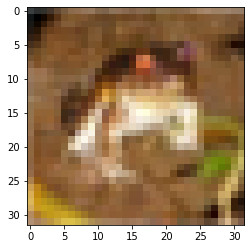

In [51]:
plt.imshow(train_data[0])

In [52]:
model = Sequential([
    Conv2D(32,3, activation = 'relu', input_shape = (32,32,3),padding = 'same'),
    MaxPooling2D(2,2),
    Conv2D(64, 3, activation = 'relu', padding = 'same'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(10, activation = 'softmax')
])

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                40970     
Total params: 60,362
Trainable params: 60,362
Non-trainable params: 0
__________________________________________________

In [54]:
# dir(keras.losses)
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

In [55]:
train_labels.shape

(50000, 10)

In [56]:
model.compile(loss = 'CategoricalCrossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), metrics = 'accuracy')

In [57]:
model.fit(train_data, train_labels, validation_split = 0.2, batch_size = 64, verbose = 2, epochs = 10)

Epoch 1/10
625/625 - 153s - loss: 2.9819 - accuracy: 0.3306 - val_loss: 1.5553 - val_accuracy: 0.4460
Epoch 2/10
625/625 - 140s - loss: 1.4491 - accuracy: 0.4884 - val_loss: 1.3889 - val_accuracy: 0.5197
Epoch 3/10
625/625 - 132s - loss: 1.3068 - accuracy: 0.5415 - val_loss: 1.3419 - val_accuracy: 0.5396
Epoch 4/10
625/625 - 140s - loss: 1.2176 - accuracy: 0.5737 - val_loss: 1.3120 - val_accuracy: 0.5519
Epoch 5/10
625/625 - 142s - loss: 1.1370 - accuracy: 0.6072 - val_loss: 1.2392 - val_accuracy: 0.5816
Epoch 6/10
625/625 - 136s - loss: 1.0765 - accuracy: 0.6296 - val_loss: 1.2092 - val_accuracy: 0.5950
Epoch 7/10
625/625 - 149s - loss: 1.0115 - accuracy: 0.6472 - val_loss: 1.2341 - val_accuracy: 0.5937
Epoch 8/10
625/625 - 139s - loss: 0.9651 - accuracy: 0.6651 - val_loss: 1.2745 - val_accuracy: 0.5890
Epoch 9/10
625/625 - 141s - loss: 0.9267 - accuracy: 0.6790 - val_loss: 1.2272 - val_accuracy: 0.6102
Epoch 10/10
625/625 - 144s - loss: 0.8870 - accuracy: 0.6939 - val_loss: 1.2253 - 

In [58]:
preds = model.predict(test_data)

In [70]:
import numpy as np

In [76]:
output_mapping[np.argmax(preds[4])]

'Shirt'

In [73]:
output_mapping = {
                 0: "T-shirt/Top",
                 1: "Trouser",
                 2: "Pullover",
                 3: "Dress",
                 4: "Coat", 
                 5: "Sandal", 
                 6: "Shirt",
                 7: "Sneaker",
                 8: "Bag",
                 9: "Ankle Boot"
                 }

In [77]:
import matplotlib.pyplot as plt

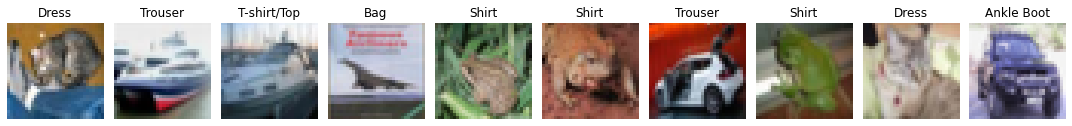

In [86]:
fig, ax = plt.subplots(nrows = 1, ncols = 10,figsize = (15,7))

for image, ax, pred in zip(test_data, ax[0:], preds):
    ax.set_axis_off()
    ax.imshow(image)
    ax.set_title(output_mapping[np.argmax(pred)])
    plt.tight_layout()
    
plt.show()